In [1]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import soundfile as sf
import pickle
import noisereduce as nr
import torch
# load audio file
# reduce noise



import os
import numpy as np
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import signal
from scipy.signal import butter, lfilter

sr = 44100

parkinson_path = 'audio/spanish/parkinson'
healthy_path = 'audio/spanish/healthy_control'
parkinson_npy_path = 'audio/spanish/npy/parkinson'
healthy_npy_path = 'audio/spanish/npy/healthy_control'
labels_npy_path =  'audio/spanish/npy/labels'
data_npy_path = 'audio/spanish/npy/audio_list'
path_list =[]
def load_audio_data(folder):
    audio_list = []
    i=0
    for root, dirs, files in os.walk(folder):
        for file in files:
            i+=1
            if file.endswith('.wav'):
                path_list.append(file)
                file_path = os.path.join(root, file)
                audio_data , sample_rate = librosa.load(file_path, sr=44100)
                threshold = 0.0005   
                max_samples =  160 * sample_rate  
                cut_first = 20*sample_rate  
                audio_data = audio_data[cut_first:]
                audio_data = audio_data[:max_samples] if audio_data.shape[0] > max_samples else audio_data
                mask = np.abs(audio_data) > threshold
                audio_data = audio_data[mask]
                nyquist = 0.5 * sample_rate
                low = 12000 / nyquist
                b, a = butter(5, low, btype='low')
                audio_data = lfilter(b, a, audio_data)
                audio_list.append(audio_data)
    return audio_list

healthy_list = load_audio_data(healthy_path)
parkinson_list = load_audio_data(parkinson_path)
healthy_last_data = random.choice(healthy_list)
parkinson_last_data = random.choice(parkinson_list)
healthy_size = len(healthy_list)
parkinson_size = len(parkinson_list)
print(path_list)

time_healthy = np.arange(0, len(healthy_last_data)) / sr
time_parkinson = np.arange(0, len(parkinson_last_data)) / sr
def fft(audio_data,sr):
    fft_result = np.fft.fft(audio_data)
    fft_magnitude = np.abs(fft_result)
    frequencies = np.fft.fftfreq(len(fft_result), 1/sr)
    return frequencies,fft_magnitude


frequencies_healthy, magnitude_healthy = fft(healthy_last_data,44100)
frequencies_parkinson, magnitude_parkinson = fft(parkinson_last_data,44100)

C:\Users\Hamid\anaconda3\envs\pytorch_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['ID00_hc_0_0_0.wav', 'ID01_hc_0_0_0.wav', 'ID03_hc_0_0_0.wav', 'ID05_hc_0_0_0.wav', 'ID08_hc_0_0_0.wav', 'ID09_hc_0_0_0.wav', 'ID10_hc_0_0_0.wav', 'ID11_hc_0_0_0.wav', 'ID12_hc_0_0_0.wav', 'ID14_hc_0_0_0.wav', 'ID15_hc_0_0_0.wav', 'ID19_hc_0_0_0.wav', 'ID21_hc_0_0_0.wav', 'ID22_hc_0_0_0.wav', 'ID23_hc_0_0_0.wav', 'ID25_hc_0_0_0.wav', 'ID26_hc_0_0_0.wav', 'ID28_hc_0_0_0.wav', 'ID31_hc_0_1_1.wav', 'ID35_hc_0_0_0.wav', 'ID36_hc_0_0_0.wav', 'ID02_pd_2_0_0.wav', 'ID04_pd_2_0_1.wav', 'ID06_pd_3_1_1.wav', 'ID07_pd_2_0_0.wav', 'ID13_pd_3_2_2.wav', 'ID16_pd_2_0_0.wav', 'ID17_pd_2_1_0.wav', 'ID18_pd_4_3_3.wav', 'ID20_pd_3_0_1.wav', 'ID24_pd_2_0_0.wav', 'ID27_pd_4_1_1.wav', 'ID29_pd_3_1_2.wav', 'ID30_pd_2_1_1.wav', 'ID32_pd_3_1_1.wav', 'ID33_pd_3_2_2.wav', 'ID34_pd_2_0_0.wav']


<Figure size 640x480 with 0 Axes>

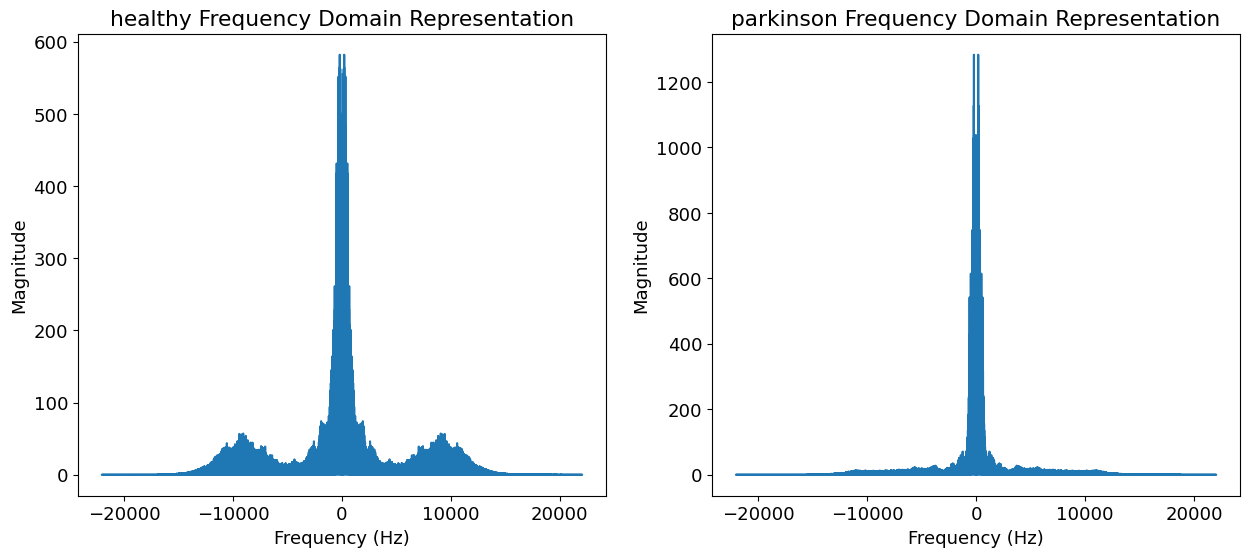

In [2]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 13})

plt.subplots_adjust(hspace=15)

plt.figure(figsize=(15, 6))




plt.subplot(1,2,1)
plt.plot(frequencies_healthy, magnitude_healthy)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("healthy Frequency Domain Representation")

plt.subplot(1,2,2)
plt.plot(frequencies_parkinson, magnitude_parkinson)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("parkinson Frequency Domain Representation")
plt.show()



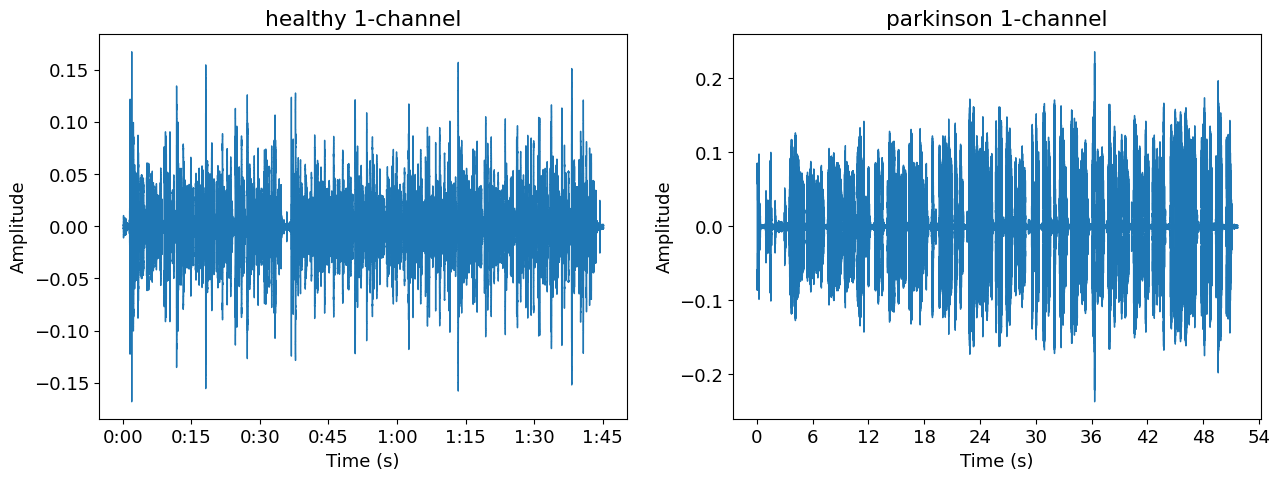

In [3]:
plt.figure(figsize=(15, 5))
plt.subplots_adjust(hspace=15)
plt.subplot(1,2,1)
librosa.display.waveshow(healthy_last_data, sr=44100)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("healthy 1-channel")




plt.subplot(1,2,2)
librosa.display.waveshow(parkinson_last_data, sr=44100)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("parkinson 1-channel")
plt.show()


In [4]:
print("Healthy Audios :", len(healthy_list) )
print("Parkinson Audios :", len(parkinson_list))

Healthy Audios : 21
Parkinson Audios : 16


In [5]:
healthy_label = [0 for _ in range(len(healthy_list))]
parkinson_label = [1 for _ in range(len(parkinson_list))]
labels = healthy_label + parkinson_label
print(len(labels))
audio_list = healthy_list + parkinson_list

37


In [6]:
with open(parkinson_npy_path, 'wb') as f:
    pickle.dump(parkinson_list, f)

# Open the file in write-binary mode and write the healthy_list to the file
with open(healthy_npy_path, 'wb') as f:
    pickle.dump(healthy_list, f)

# Open the file in write-binary mode and write the audio_list to the file
with open(data_npy_path, 'wb') as f:
    pickle.dump(audio_list, f)

# Open the file in write-binary mode and write the labels to the file
with open(labels_npy_path, 'wb') as f:
    pickle.dump(labels, f)